In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

history = pd.DataFrame()

for i in range(9):
    f = open('spotify_data/StreamingHistory{}.json'.format(i), encoding='utf-8')
    data = json.load(f)
    df = pd.DataFrame(data)
    history = pd.concat([history, df], ignore_index=True)

history = history.loc[history['trackName'] !="Unknown Track"]
history = history.loc[history['msPlayed'] >=20000]
history['minsPlayed'] = history['msPlayed']/(1000*60)

spring = history.loc[history['endTime']<'2022-05-11'].copy()
summer = history.loc[(history['endTime']>='2022-05-11') & (history['endTime']<'2022-08-28')].copy()
fall = history.loc[history['endTime']>='2022-08-28'].copy()


summer_home = history.loc[(history['endTime']>='2022-05-11') & (history['endTime']<'2022-06-02')].copy()
summer_sf = history.loc[(history['endTime']>='2022-06-02') & (history['endTime']<'2022-08-28')].copy()


spring['endTime']= pd.DatetimeIndex(spring['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer_home['endTime'] = pd.DatetimeIndex(summer_home['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer_sf['endTime']= pd.DatetimeIndex(summer_sf['endTime']).tz_localize('UTC').tz_convert('America/Los_Angeles').tz_localize(None)
fall['endTime']= pd.DatetimeIndex(fall['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
history = pd.concat([spring, summer_home, summer_sf, fall], ignore_index=True)

summer = pd.concat([summer_home, summer_sf], ignore_index=True)

history['date'] = pd.DatetimeIndex(history['endTime']).date
history

,endTime,artistName,trackName,msPlayed,minsPlayed,date
0,2021-12-31 19:03:00,Swedish House Mafia,Save The World,209705,3.495083,2021-12-31
1,2021-12-31 19:06:00,Sam Feldt,Post Malone (feat. RANI),169642,2.827367,2021-12-31
2,2021-12-31 19:09:00,Tiësto,Wasted,190013,3.166883,2021-12-31
3,2021-12-31 19:13:00,Lana Del Rey,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,214912,3.581867,2021-12-31
4,2021-12-31 19:17:00,Calvin Harris,This Is What You Came For,222160,3.702667,2021-12-31
...,...,...,...,...,...,...
67088,2023-01-01 18:28:00,Will Gittens,Vibin,47143,0.785717,2023-01-01
67089,2023-01-01 18:33:00,Dayglow,Can I Call You Tonight?,278769,4.646150,2023-01-01
67090,2023-01-01 18:36:00,ILLENIUM,First Time,165779,2.762983,2023-01-01
67091,2023-01-01 18:40:00,Martin Garrix,No Sleep (feat. Bonn) - DubVision Remix,239062,3.984367,2023-01-01


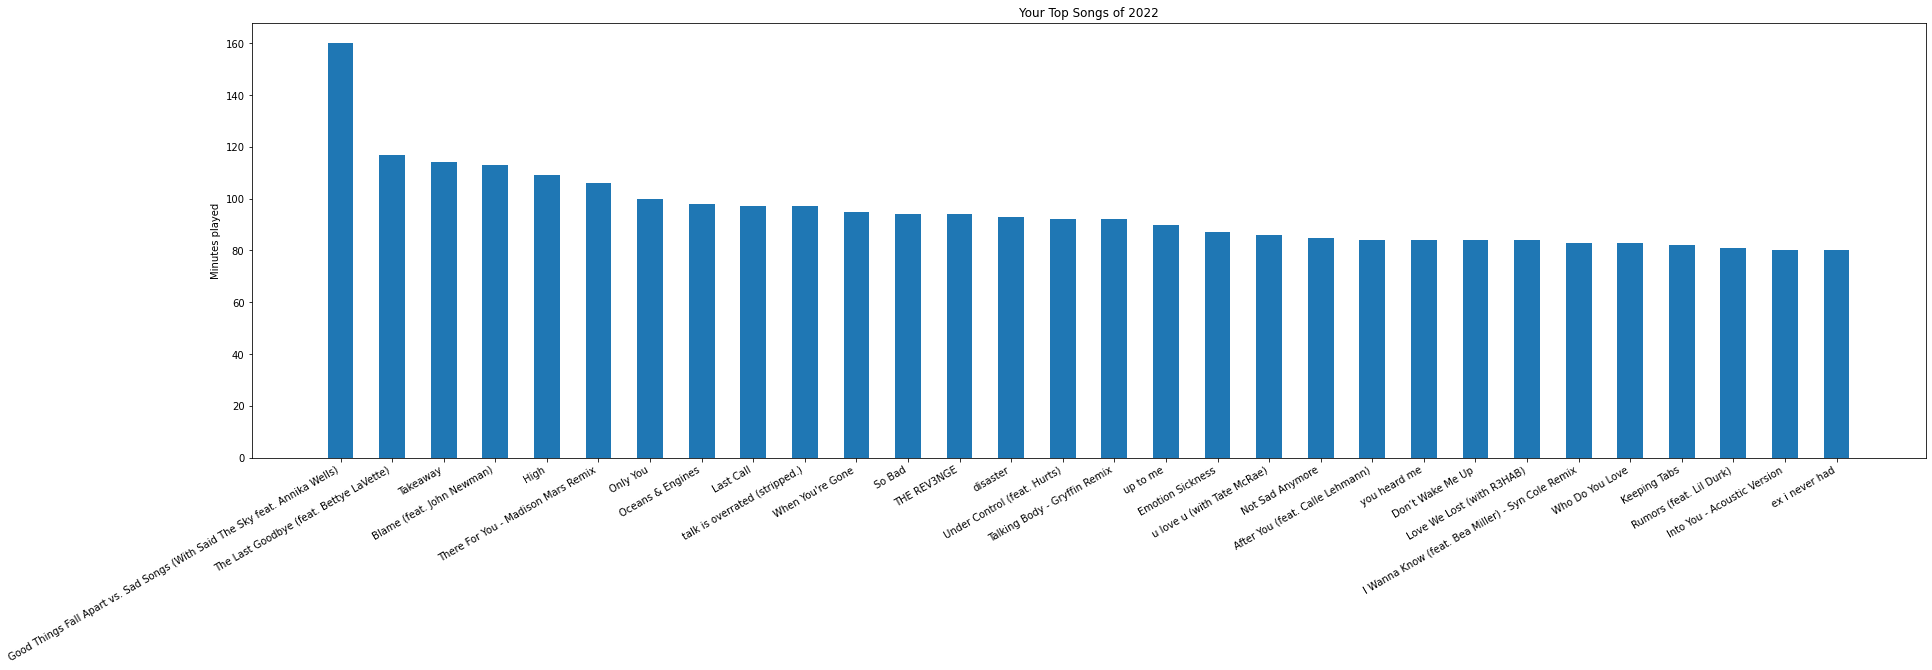

In [2]:
song_counts = history.groupby(['trackName', 'artistName'], as_index=False).size().sort_values(by='size', ascending=False)
song_totals = history.groupby(['trackName', 'artistName'], as_index=False)['minsPlayed'].sum().sort_values(by='minsPlayed', ascending=False)

values = song_counts['size'].values[:30]
labels = song_counts['trackName'].values[:30]
indexes = np.arange(len(labels))

plt.figure(figsize=(30,8))
plt.title('Your Top Songs of 2022')
plt.bar(indexes, values, 0.5)
plt.xticks(indexes, labels, rotation = 30, ha='right')
plt.ylabel('Minutes played')
plt.show()

In [3]:
# top_artists = artist_totals.index.values[:10]
top_songs = song_counts['trackName'].values[:10]


all_dates = history[['date']].drop_duplicates()
song_daily_totals = history.groupby(['date', 'trackName', 'artistName'], as_index=False)['minsPlayed'].agg(sum)
top_songs_df = pd.DataFrame()
for song in top_songs:
    song_df = all_dates.merge(song_daily_totals.loc[song_daily_totals['trackName']==song], how='left', on = ['date'])
    song_df['trackName'].fillna(value=song, inplace=True)
    song_df['minsPlayed'].fillna(value=0, inplace=True)
    song_df['avg_minsPlayed'] = song_df['minsPlayed'].rolling(14, win_type='gaussian', center=True).mean(std=3)
    top_songs_df = pd.concat([top_songs_df, song_df])
    
top_songs_df

,date,trackName,artistName,minsPlayed,avg_minsPlayed
0,2021-12-31,Good Things Fall Apart vs. Sad Songs (With Sai...,NaN,0.000000,NaN
1,2022-01-01,Good Things Fall Apart vs. Sad Songs (With Sai...,NaN,0.000000,NaN
2,2022-01-02,Good Things Fall Apart vs. Sad Songs (With Sai...,NaN,0.000000,NaN
3,2022-01-03,Good Things Fall Apart vs. Sad Songs (With Sai...,NaN,0.000000,NaN
4,2022-01-04,Good Things Fall Apart vs. Sad Songs (With Sai...,NaN,0.000000,NaN
...,...,...,...,...,...
362,2022-12-28,talk is overrated (stripped.),Jeremy Zucker,2.350000,NaN
363,2022-12-29,talk is overrated (stripped.),NaN,0.000000,NaN
364,2022-12-30,talk is overrated (stripped.),Jeremy Zucker,2.204333,NaN
365,2022-12-31,talk is overrated (stripped.),NaN,0.000000,NaN


/Users/jyin/spotify-analysis/utils.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold', color=pal[num_factors-1])


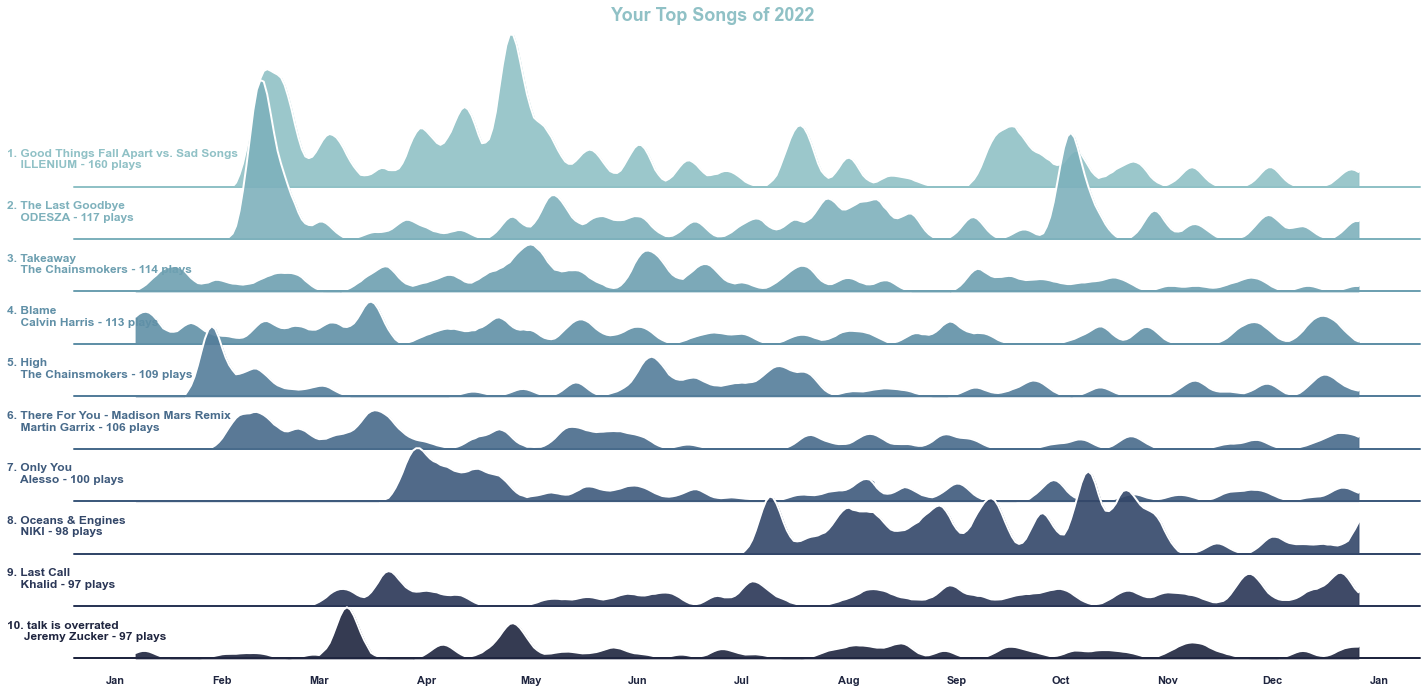

In [6]:
from utils import timeseries_ridgeplot

# y_labels = {top_songs[i]: f"{i+1}. {top_songs[i]}\n" + " "*(3+len(str(i+1)))+ f"{round(song_totals[top_songs[i]]):,} mins" for i in range(len(top_songs))}
y_labels = {top_songs[i]: f"{i+1}. {top_songs[i].split('(')[0]}\n" + " "*(3+len(str(i+1)))+ f"{song_totals.loc[song_totals['trackName'] == top_songs[i], 'artistName'].values[0]} - {round(song_counts.loc[song_counts['trackName'] == top_songs[i], 'size'].values[0]):,} plays"  for i in range(len(top_songs))}
timeseries_ridgeplot(top_songs_df, factor='trackName', y='avg_minsPlayed', dateCol = 'date', title='Your Top Songs of 2022', save_name='top_songs.png', labels=y_labels)